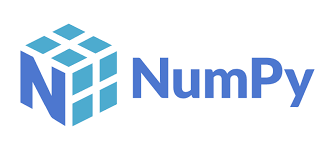

In [1]:
import numpy as np

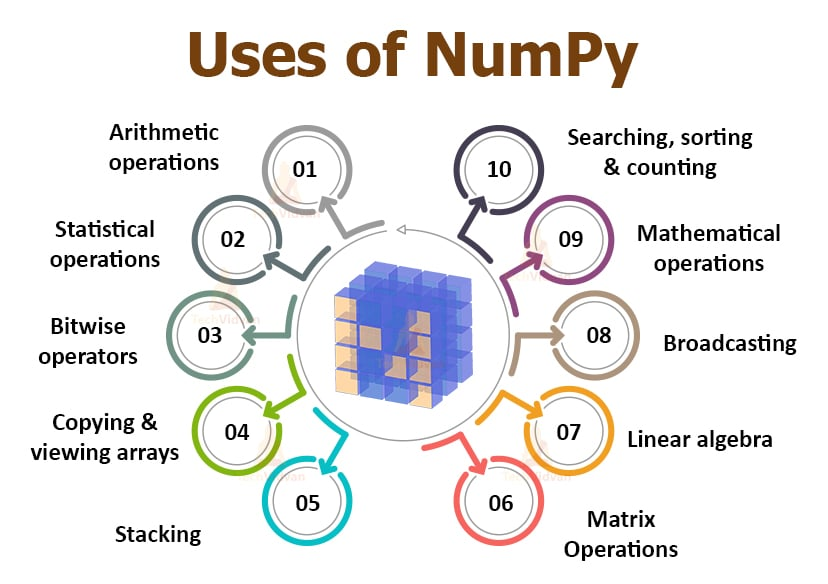

In [2]:
# Basic array operations
x = [1, 2, 3]
y = [8, 9, 10]

x + y  # List concatenation

[1, 2, 3, 8, 9, 10]

In [ ]:
# Convert to numpy arrays
a = np.array(x)
b = np.array(y)

a + b  # Element-wise addition

In [ ]:
x * y  # List repetition (not mathematical multiplication)
a * b   # Element-wise multiplication
a @ b    # Dot product
a.dot(b) # Dot product (alternative syntax)

In [ ]:
# Performance comparison: lists vs numpy arrays
x = [i**2 for i in range(10**6)]
y = np.array(x)

In [ ]:
# Timing comparison (commented out for notebook)
# %%timeit 
# sum(x)  # Sum using Python built-in

# %%timeit 
# np.sum(y)  # Sum using numpy

## Problem 1: Maximum before zero

Implement a function that returns the maximum element in vector x among elements that are preceded by a zero.

For example, for `x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])` the answer is 5. If there are no zero elements, the function should return None.

In [ ]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
x == 0  # Boolean mask for zeros

In [ ]:
# Working with boolean masks
x[x > 0]  # Positive elements
x[x > 0].size  # Count of positive elements
x[x > 0].shape  # Shape of filtered array

In [ ]:
# Create mask for elements after zeros
mask = np.hstack((False, x == 0))[:-1]
mask

In [ ]:
# Get elements after zeros and find maximum
x[mask]  # Elements after zeros
x[mask].max()  # Maximum among elements after zeros

In [ ]:
def get_max_before_zero(x):
    """Return maximum element that follows a zero element"""
    mask = np.hstack((False, x == 0))[:-1]
    return x[mask].max()

get_max_before_zero(x)

## Problem 2: Normalization

I have a matrix $X$ from uniform distribution $U[-5; 5]$. We need to normalize the columns of this matrix so that they all lie in the interval $[0;1]$.

$$
x' = \frac{x - min(x)}{max(x) - min(x)}
$$

In [ ]:
from scipy import stats

# Generate uniform distribution data
uniform_rv = stats.uniform(-5, 10)  # [-5; -5 + 10] = [-5; 5]
X = uniform_rv.rvs((100, 3))  # 100x3 matrix
X

In [ ]:
# Basic matrix operations
X[X > 0].sum()  # Sum of positive elements
X.size          # Total number of elements
X.shape         # Matrix dimensions
X.T.shape       # Transpose dimensions

In [ ]:
# Matrix algebra
A = X.T @ X  # Matrix multiplication
A

In [ ]:
# Linear algebra operations
np.linalg.det(A)     # Determinant
np.linalg.eig(A)     # Eigenvalues and eigenvectors
np.linalg.svd(A)     # Singular value decomposition

In [ ]:
# Statistical operations
X.mean()          # Overall mean
X.mean(axis=0)    # Column means
X.mean(axis=1)    # Row means
X.max(axis=0)     # Column maximums
X.var(axis=0)     # Column variances

In [ ]:
# Vector shapes and operations
a = np.array([1, 2, 3])        # Simple vector
a = np.array([[1, 2, 3]])      # Row vector
a.shape
b = a.T                         # Column vector
b

In [ ]:
# Matrix-vector multiplication
A @ a  # [3x3] trying to multiply by [1x3] - dimension mismatch
A @ b  # [3x3] multiplying by [3x1] - works correctly

In [ ]:
# Matrix properties
np.linalg.matrix_rank(A)  # Matrix rank
np.diag(A).sum()          # Trace of matrix (sum of diagonal)

In [ ]:
# Matrix inversion
B = np.linalg.inv(A)  # Inverse matrix
B
A @ B                 # Should be identity matrix

In [ ]:
# Floating point precision demonstration
0.3 - 0.1
0.3 - 0.1 == 0.2  # Floating point comparison

# Calculate error in matrix inversion
np.sqrt(np.sum((np.eye(3) - A @ B)**2))

## Back to normalization problem

In [ ]:
# Column-wise normalization
X.min(axis=0)                           # Column minimums
X.max(axis=0) - X.min(axis=0)           # Column ranges
X_scale = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))  # Normalized matrix
X_scale[:4]                             # First 4 rows

In [ ]:
# Verify normalization
X_scale.min(axis=0), X_scale.max(axis=0)  # Should be (0, 1) for each column

## K-Nearest Neighbors Example

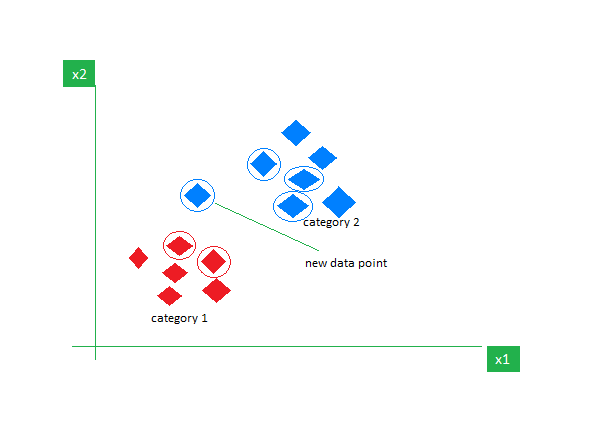

In [ ]:
# Sample data: weight, height, obesity (0=no, 1=yes)
data = np.array([[80, 40, 150], [1.9, 1.5, 1.7], [0, 0, 1]]).T
data  # First column: weight, second: height, third: obesity presence

In [ ]:
# New observation
x_new = np.array([130, 2.1])  # K-nearest neighbors method
X = data[:, :2]               # Features (weight, height)
r = np.sqrt(np.sum((X - x_new)**2, axis=1))  # Euclidean distances
r

In [ ]:
np.argmin(r)  # Index of nearest neighbor
# According to this, our person also has obesity and should see doctors

In [ ]:
# Check the calculations
(150 - 130)**2, (2.1 - 1.7)**2, (210 - 170)**2  # Manual distance calculation

In [ ]:
# Normalize features for better distance calculation
X_scale = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scale
x_new_scale = (x_new - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
r = np.sqrt(np.sum((X_scale - x_new_scale)**2, axis=1))  # Normalized distances
r

In [ ]:
np.argmin(r)  # Actually no obesity, no need to visit doctors!

## Problem 3: Find closest column

Let's complicate the previous problem! Given a matrix X and a vector v. We need to find the column in matrix X that is closest to vector v.

In [ ]:
# Generate sample data
X = np.random.binomial(100, 0.5, size=(5, 3)) / 100
v = np.random.uniform(size=(5, 1))
X, v

In [ ]:
# Calculate distances to each column
R = np.sqrt(np.sum((X - v)**2, axis=0))
np.where(R == np.min(R))  # Index of closest column

In [ ]:
# Get the closest column
X[:, np.where(R == np.min(R))[0]]

## Bonus Problem: Pairwise distances

I want to compute the Euclidean distance between each row of matrix A and B

In [ ]:
# Generate sample matrices
A = np.random.normal(size=(3, 4))
B = np.random.normal(size=(3, 4))
A, B

In [ ]:
# Simple row-wise distance
np.sqrt(np.sum((A - B)**2, axis=1))

In [ ]:
# Understanding array broadcasting
print("A shape:", A.shape)
print("A[None, :, :] shape:", A[None, :, :].shape)  # Add batch dimension
print("A[:, None, :] shape:", A[:, None, :].shape)  # Add row dimension
print("A[:, :, None] shape:", A[:, :, None].shape)  # Add column dimension

In [ ]:
# Calculate pairwise distances using broadcasting
np.sqrt(np.sum((A[:, None, :] - B)**2, axis=2))

In [ ]:
# Compare with simple row-wise distance
np.sqrt(np.sum((A - B)**2, axis=1))